MinMax Scaling

MinMax scaling is the process of rescaling the attributes so that they have min as 0 and max as 1. The ultimate goal to perform MinMax scaling is to bring down all the features to a common scale without distorting the differences in the range of the values. Its helpful when we have idea about min and max value of features by domain knowledge.

Formula

X'= (X - Xmin)/(Xmax-Xmin).

In [1]:
# Libraries :-
import pandas as pd # Data-Processing 
import numpy as np # Linear-Algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
import scipy.stats as stats  
%matplotlib inline
from sklearn.model_selection import train_test_split  # Train-Test-Split
from sklearn.preprocessing import MinMaxScaler        # Min-Max-Scaling
from sklearn.linear_model import LogisticRegression   # Logistic-Regression
from sklearn.metrics import accuracy_score            # Accuracy
from sklearn.preprocessing import StandardScaler      # Standard-Scaling
from sklearn.preprocessing import RobustScaler        # Robust-Scaling
from sklearn.model_selection import cross_val_score   # Cross-Validation
from sklearn.model_selection import StratifiedKFold   # StratifiedKFold
from sklearn.model_selection import ShuffleSplit      # ShuffleSplit

In [5]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# No use of User Id & Gender :-
df = df.iloc[:,2:]

In [8]:
# Sample of New df :-
df.sample(5)

,Age,EstimatedSalary,Purchased
41,33,51000,0
351,37,75000,0
376,46,74000,0
12,20,86000,0
77,22,27000,0


In [9]:
# Info of df :-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [24]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
# Stats Of df :-
df[['Age','EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.500,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0


In [11]:
# Scatter Plot of age & EstimatedSalery :-
fig = px.scatter(df, x="Age", y="EstimatedSalary",color='Age',size='EstimatedSalary', trendline='ols')
fig.show()

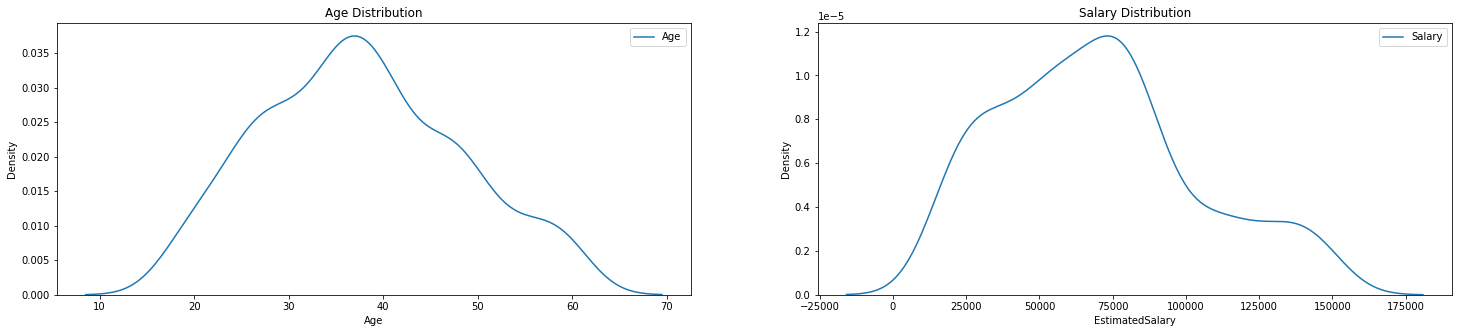

In [12]:
# PDF of Age & Salary_distribution :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# Age
ax1.set_title('Age Distribution')
sns.kdeplot(df['Age'], ax=ax1, label='Age')
ax1.legend()
# Salary
ax2.set_title('Salary Distribution')
sns.kdeplot(df['EstimatedSalary'], ax=ax2 , label='Salary')
ax2.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



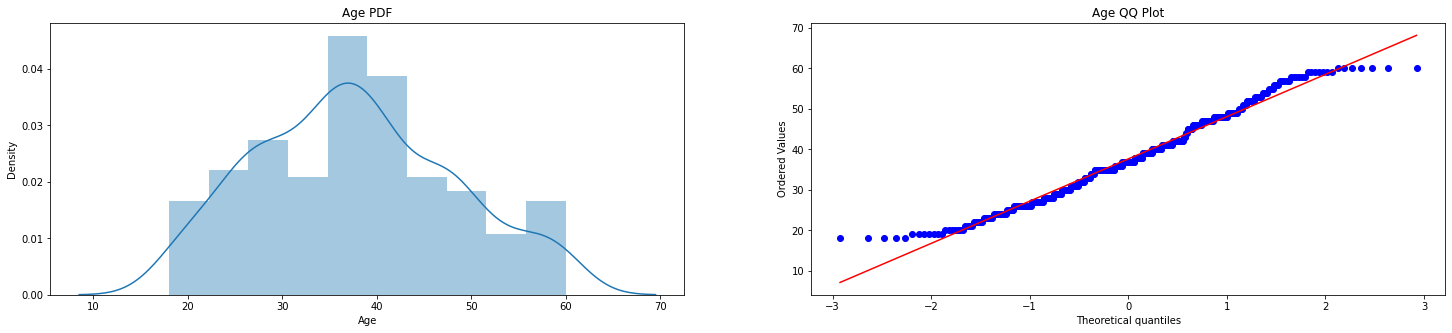

In [13]:
# Pdf of Age :-
plt.figure(figsize=(25,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')
# Age QQ Plot :-
plt.subplot(122)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



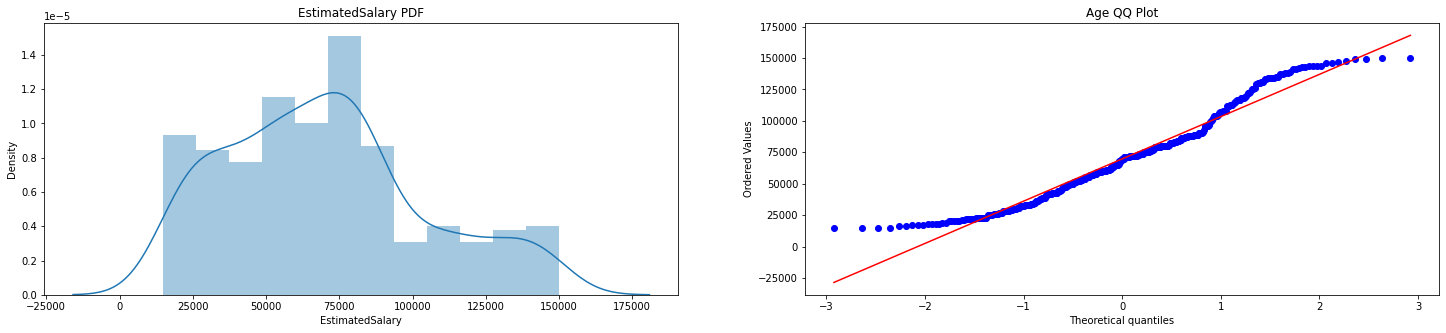

In [14]:
# Pdf of EstimatedSalary :-
plt.figure(figsize=(25,5))
plt.subplot(121)
sns.distplot(df['EstimatedSalary'])
plt.title('EstimatedSalary PDF')
# Age QQ Plot :-
plt.subplot(122)
stats.probplot(df['EstimatedSalary'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [15]:
# Define X & Y :-
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [16]:
# Train Test Split :-
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [17]:
# Min-Max- Scaling :-
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_MinMax_scaled=scaler.transform(X_train)
X_test_MinMax_scaled=scaler.transform(X_test)

In [18]:
# Scaled Numpy Series Into df :-
X_train_MinMax_scaled = pd.DataFrame(X_train_MinMax_scaled, columns=X_train.columns)
X_test_MinMax_scaled = pd.DataFrame(X_test_MinMax_scaled, columns=X_test.columns)

In [19]:
# X train df :-
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [20]:
# Scaled df :-
X_train_MinMax_scaled

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481
...,...,...
275,0.714286,0.111111
276,0.261905,0.207407
277,0.428571,0.274074
278,0.214286,0.288889


In [27]:
# Stats. Of X train :-
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [25]:
# Stats of  Scaled X train :-
np.round(X_train_MinMax_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


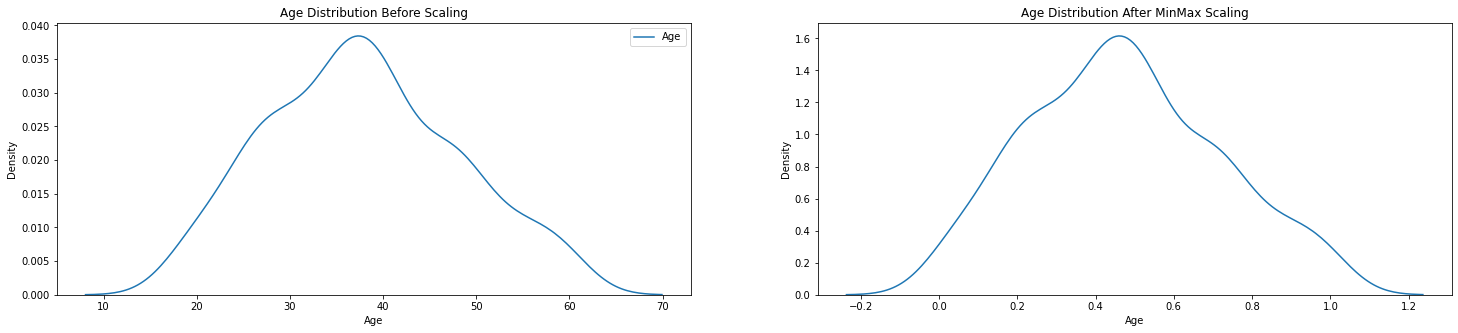

In [28]:
# PDF of Age Before & After :- 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# before scaling :-
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
ax1.legend()
# after scaling :-
ax2.set_title('Age Distribution After MinMax Scaling')
sns.kdeplot(X_train_MinMax_scaled['Age'], ax=ax2,label='Salary')
ax1.legend()
plt.show()

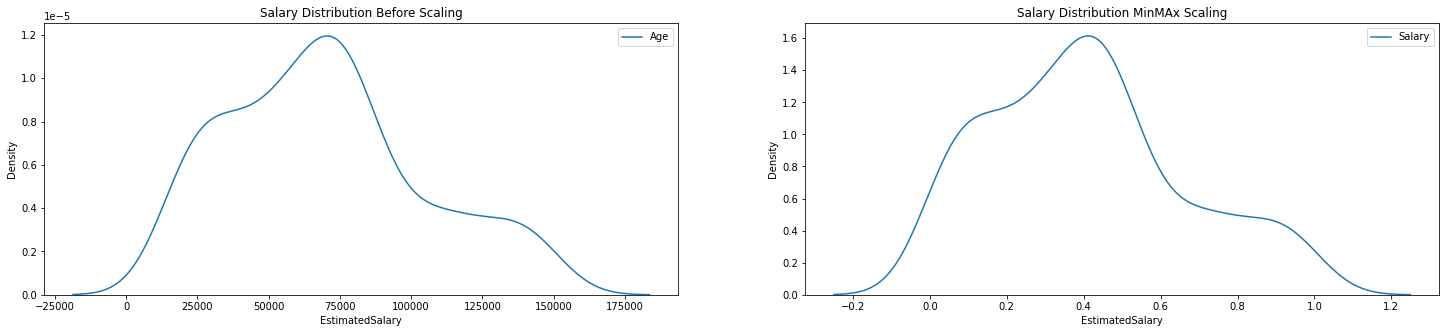

In [29]:
# PDF of Salary Before & After :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# before scaling :-
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='Age')
ax1.legend()
# after scaling :-
ax2.set_title('Salary Distribution MinMAx Scaling')
sns.kdeplot(X_train_MinMax_scaled['EstimatedSalary'], ax=ax2,label='Salary')
ax2.legend()
plt.show()

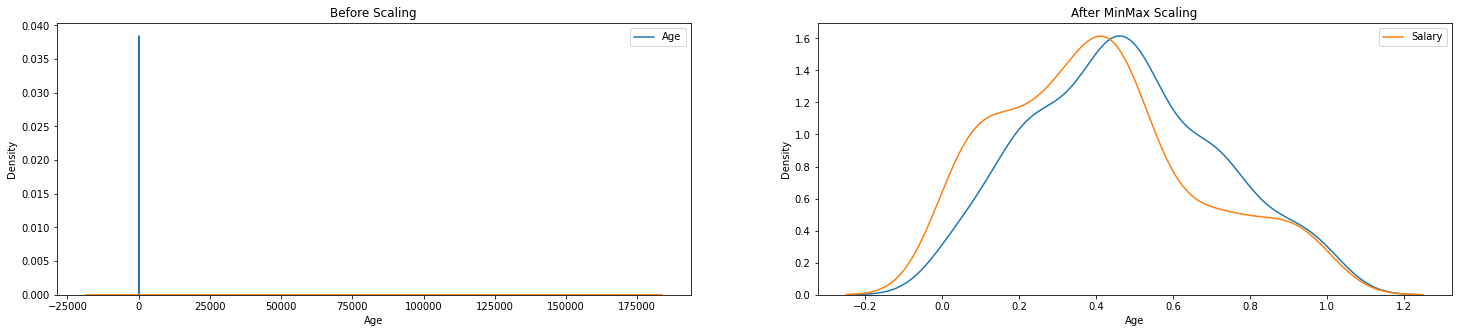

In [30]:
# PDF of Age Vs Salary Before & After :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# before scaling :-
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.legend()
# after scaling :-
ax2.set_title('After MinMax Scaling')
sns.kdeplot(X_train_MinMax_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_MinMax_scaled['EstimatedSalary'], ax=ax2,label='Salary')
ax2.legend()
plt.show()

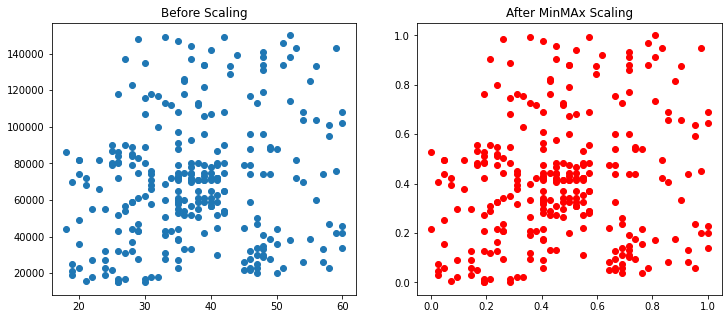

In [31]:
# Scatter Plot of Age-Salary Before & After :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_MinMax_scaled['Age'], X_train_MinMax_scaled['EstimatedSalary'],color='red')
ax2.set_title("After MinMAx Scaling")
plt.show()

In [32]:
# Logistic Regression :-
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [33]:
# Fitting :-
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_MinMax_scaled,y_train)

LogisticRegression()

In [34]:
# Modal Prediction :-
y_pred = lr.predict(X_test)
y_pred_MinMax_scaled = lr_scaled.predict(X_test_MinMax_scaled)

In [35]:
# Accuracy Before & After 
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_MinMax_scaled))

Actual 0.6583333333333333
Scaled 0.8416666666666667


In [36]:
# Cross Validation :-
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
skfold=StratifiedKFold(n_splits=5)

print("Actual_ssplit :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=ssplit)))
print("Actual_skfold :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=skfold)))
print("--------------------------------------------------------------------------------------------------")
X_scale= scaler.fit_transform(X)
print("Scaled_ssplit :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=ssplit)))
print("Scaled_skflod :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=skfold)))

Actual_ssplit : 0.6266666666666667
Actual_skfold : 0.675
--------------------------------------------------------------------------------------------------
Scaled_ssplit : 0.8191666666666666
Scaled_skflod : 0.8099999999999999


In [37]:
# Standard Scaling :-
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters :-
scaler.fit(X_train)

# transform train and test sets :-
X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

In [38]:
# Numpy to df :-
X_train_std_scaled = pd.DataFrame(X_train_std_scaled, columns=X_train.columns)
X_test_std_scaled = pd.DataFrame(X_test_std_scaled, columns=X_test.columns)

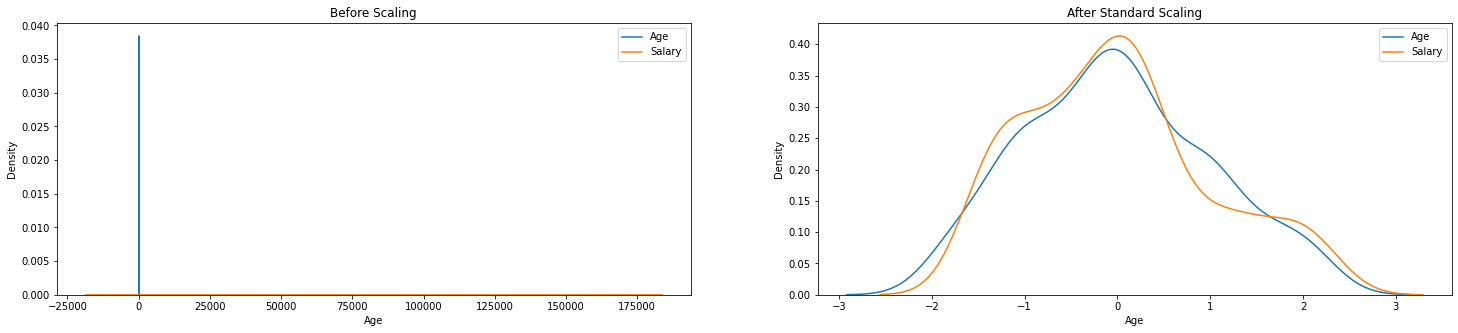

In [39]:
# PDF Age-Salary Before & After Scaling  :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='Salary')
ax1.legend()
# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_std_scaled['Age'], ax=ax2,label='Age')
sns.kdeplot(X_train_std_scaled['EstimatedSalary'], ax=ax2,label='Salary')
ax2.legend()
plt.show()

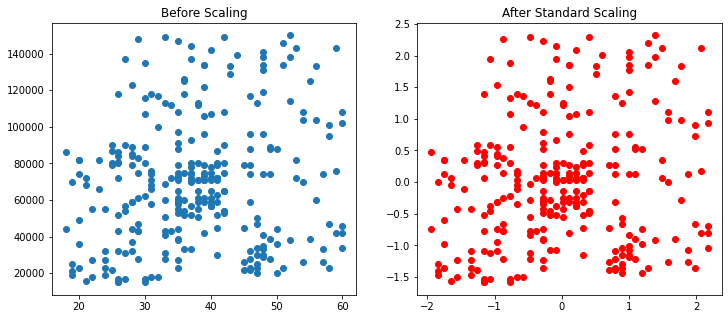

In [40]:
# Scatter Plot Age-Salary Before & After Scaling  :-
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_std_scaled['Age'], X_train_std_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Standard Scaling")
plt.show()

In [41]:
# Logistic Regression :-
lr = LogisticRegression()
lr_scaled = LogisticRegression()
# Fitting :-
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_std_scaled,y_train)

LogisticRegression()

In [42]:
# Prediction :-
y_pred = lr.predict(X_test)
y_pred_std_scaled = lr_scaled.predict(X_test_std_scaled)

In [43]:
# Accuracy Before & After Standard Scaling :-
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_std_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [44]:
# Cross Validation :-
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
skfold=StratifiedKFold(n_splits=5)

print("Actual_ssplit :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=ssplit)))
print("Actual_skfold :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=skfold)))
print("--------------------------------------------------------------------------------------------------")
X_scale= scaler.fit_transform(X)
print("Scaled_ssplit :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=ssplit)))
print("Scaled_skflod :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=skfold)))

Actual_ssplit : 0.655
Actual_skfold : 0.675
--------------------------------------------------------------------------------------------------
Scaled_ssplit : 0.8474999999999999
Scaled_skflod : 0.8275


In [45]:
# Robust Scaling :-
scaler = RobustScaler()
# fit the scaler to the train set, it will learn the parameters :-
scaler.fit(X_train)

# transform train and test sets :-
X_train_robust_scaled = scaler.transform(X_train)
X_test_robust_scaled = scaler.transform(X_test)

In [46]:
# Numpy to df :- 
X_train_robust_scaled = pd.DataFrame(X_train_robust_scaled, columns=X_train.columns)
X_test_robust_scaled = pd.DataFrame(X_test_robust_scaled, columns=X_test.columns)

In [47]:
# Robust Scaling :-
scaler = RobustScaler()
# fit the scaler to the train set, it will learn the parameters :-
scaler.fit(X_train)

# transform train and test sets :-
X_train_robust_scaled = scaler.transform(X_train)
X_test_robust_scaled = scaler.transform(X_test)

In [48]:
# Numpy to df :- 
X_train_robust_scaled = pd.DataFrame(X_train_robust_scaled, columns=X_train.columns)
X_test_robust_scaled = pd.DataFrame(X_test_robust_scaled, columns=X_test.columns)

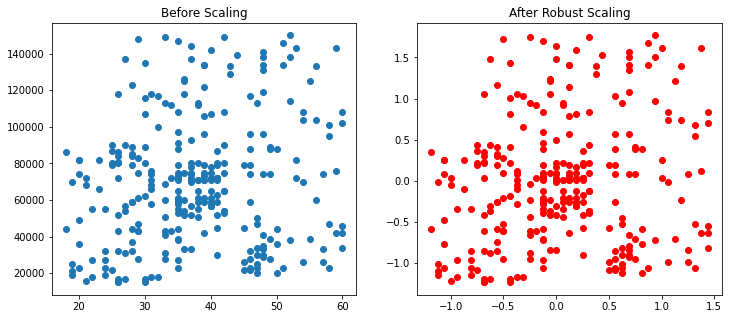

In [49]:
# Scatter Plot Age-Salary Before & After Scaling  :- 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_robust_scaled['Age'], X_train_robust_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Robust Scaling")
plt.show()

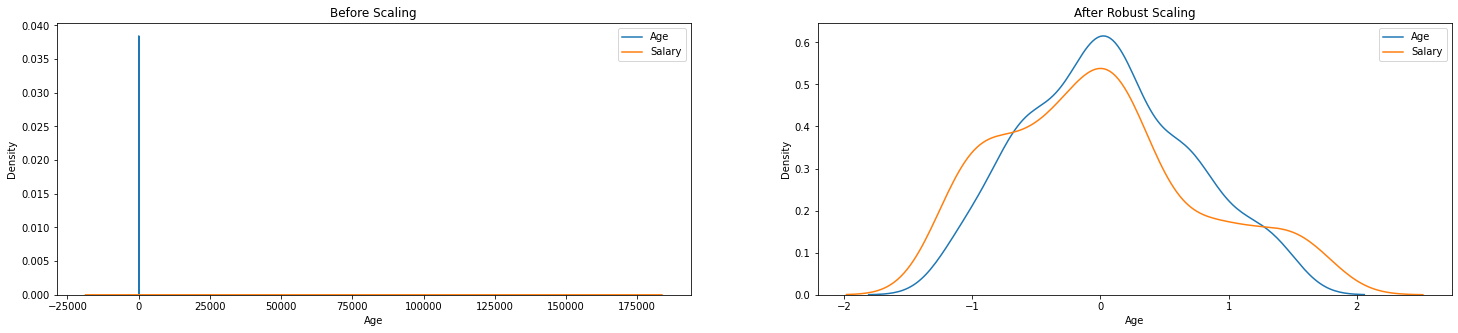

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='Salary')
ax1.legend()
# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_robust_scaled['Age'], ax=ax2,label='Age')
sns.kdeplot(X_train_robust_scaled['EstimatedSalary'], ax=ax2,label='Salary')
ax2.legend()
plt.show()

In [51]:
# LogisticRegression :-
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [52]:
# Fitting :-
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_robust_scaled,y_train)

LogisticRegression()

In [53]:
# Predication :-
y_pred = lr.predict(X_test)
y_pred_robust_scaled = lr_scaled.predict(X_test_robust_scaled)

In [54]:
# Accuracy :-
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_robust_scaled))

Actual 0.6583333333333333
Scaled 0.875


In [55]:
# Cross Validation :-
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
skfold=StratifiedKFold(n_splits=5)

print("Actual_ssplit :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=ssplit)))
print("Actual_skfold :",np.mean(cross_val_score(LogisticRegression(),X,y,cv=skfold)))
print("--------------------------------------------------------------------------------------------------")
X_scale= scaler.fit_transform(X)
print("Scaled_ssplit :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=ssplit)))
print("Scaled_skflod :",np.mean(cross_val_score(LogisticRegression(),X_scale,y,cv=skfold)))

Actual_ssplit : 0.6708333333333334
Actual_skfold : 0.675
--------------------------------------------------------------------------------------------------
Scaled_ssplit : 0.8333333333333334
Scaled_skflod : 0.8275


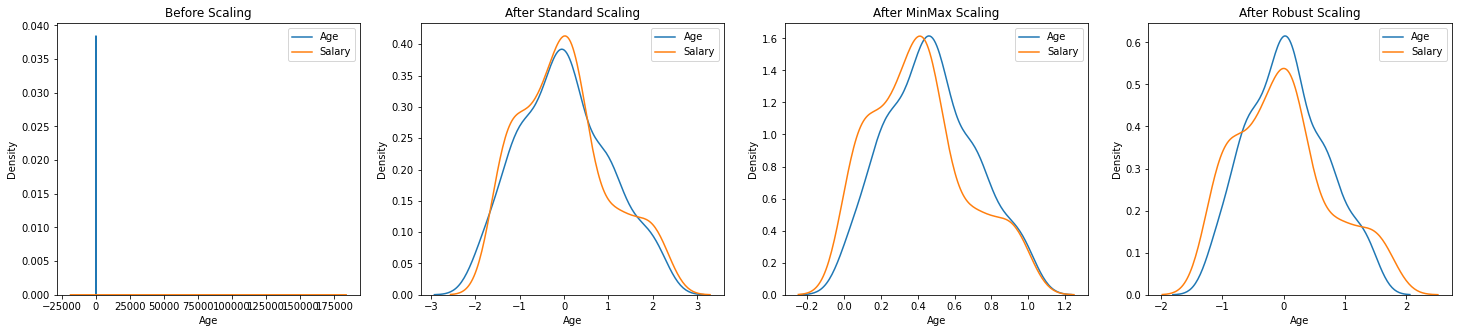

In [56]:
# PDF Before Vs After :-
fig, (ax1, ax2 , ax3, ax4) = plt.subplots(ncols=4, figsize=(25, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='Salary')
ax1.legend()
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_std_scaled['Age'], ax=ax2,label='Age')
sns.kdeplot(X_train_std_scaled['EstimatedSalary'], ax=ax2,label='Salary')
ax2.legend()
ax3.set_title('After MinMax Scaling')
sns.kdeplot(X_train_MinMax_scaled['Age'], ax=ax3,label='Age')
sns.kdeplot(X_train_MinMax_scaled['EstimatedSalary'], ax=ax3,label='Salary')
ax3.legend()
ax4.set_title('After Robust Scaling')
sns.kdeplot(X_train_robust_scaled['Age'], ax=ax4,label='Age')
sns.kdeplot(X_train_robust_scaled['EstimatedSalary'], ax=ax4,label='Salary')
ax4.legend()
plt.show()

In [58]:
print("Actual",accuracy_score(y_test,y_pred))
print("MinMax_Scaled",accuracy_score(y_test,y_pred_MinMax_scaled))
print("Std_caled",accuracy_score(y_test,y_pred_std_scaled))
print("Robust_Scaled",accuracy_score(y_test,y_pred_robust_scaled))

Actual 0.6583333333333333
MinMax_Scaled 0.8416666666666667
Std_caled 0.8666666666666667
Robust_Scaled 0.875
